In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')

In [5]:
# sample 10000 instances of the data
df = df_original.sample(n = 10000)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
3970433,266508,2013-01-29 08:16:50,5,219,4.06,430.87,219,26604,3,2.0,0,0.00,0.0129,4.98,8,135.00,0,971,2,5,4,4,2,0,NaN,753.83,0,NaN,NaN,NaN,-1.0,0.0,6.0,-1.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3008577,202013,2013-05-23 13:14:14,5,219,NaN,NaN,219,126638,3,4.0,1,3.26,0.1810,5.05,35,119.00,0,16517,1,1,2,0,1,1,NaN,288.69,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3533531,237238,2013-02-07 19:29:13,5,219,NaN,NaN,219,20391,3,3.5,0,2.83,0.1183,5.22,18,195.00,0,4695,1,8,2,0,1,1,NaN,40.65,1,NaN,NaN,NaN,-1.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3836720,257569,2013-01-28 17:15:41,5,219,NaN,NaN,219,85502,3,4.5,1,3.81,0.1257,5.38,30,110.00,0,17603,3,4,2,0,1,1,NaN,490.25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2328270,156373,2013-05-02 02:04:16,24,81,NaN,NaN,164,100421,3,3.5,0,5.16,NaN,4.23,11,30.06,1,1479,2,29,1,1,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [6]:
# the shape of the data
print("the shape of the data ",df.shape)
# the name of the columns
print(df.columns)
# data type
# print(df.dtypes)

the shape of the data  (10000, 54)
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'com

In [7]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9524
visitor_hist_adr_usd           9519
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                19
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2134
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9346
orig_destination_distance      3204
random_bool                       0
comp1_rate                  

<AxesSubplot:>

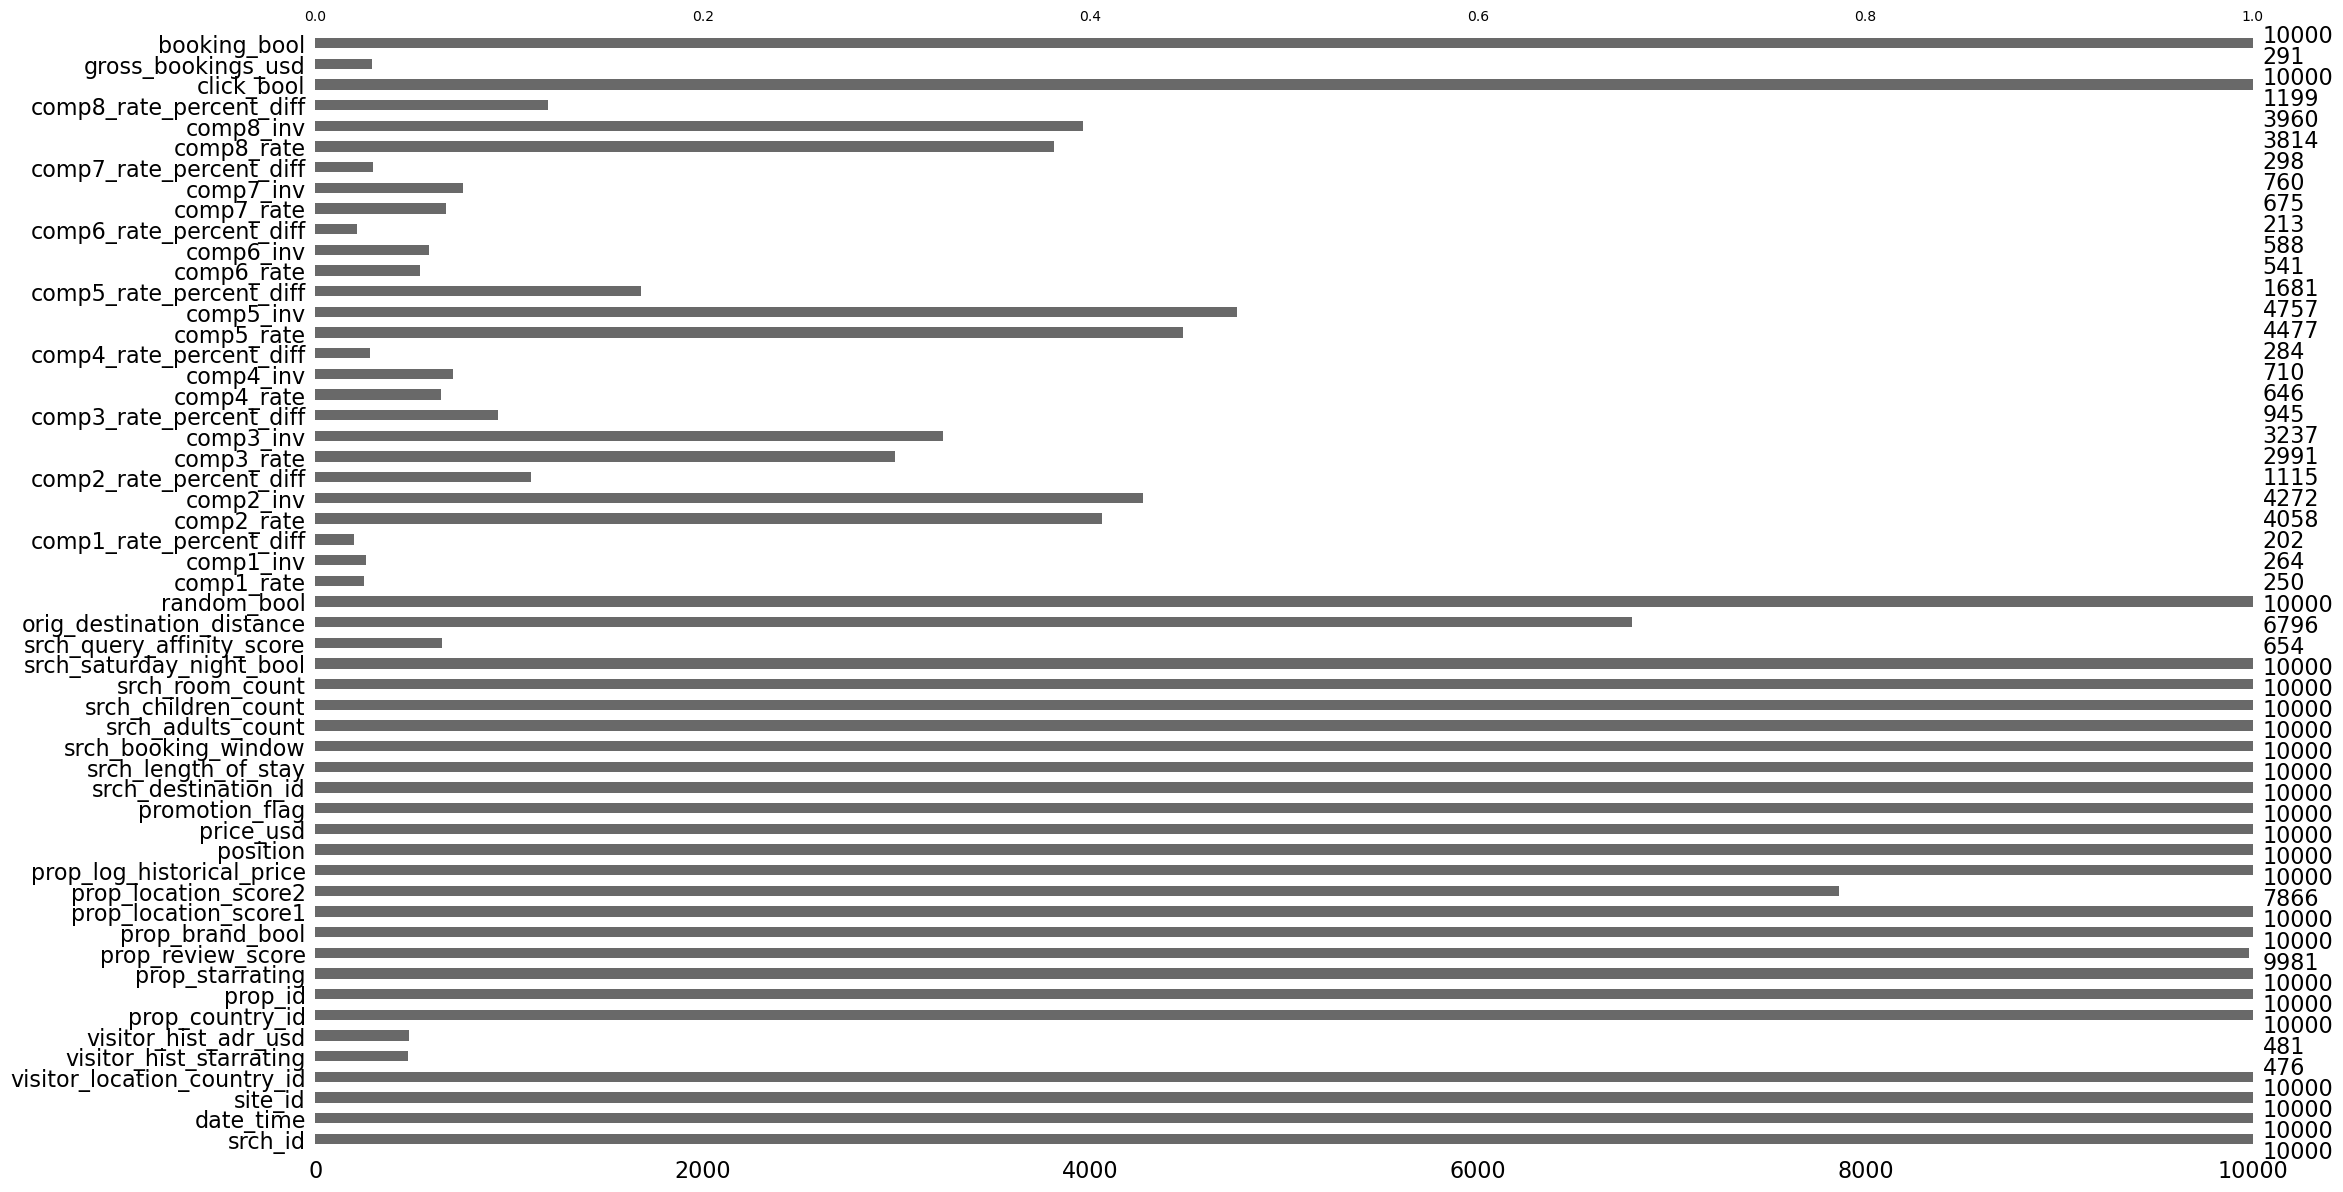

In [8]:
import missingno as msno
# visualize the missing values
msno.bar(df)

In [9]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,476.000000,481.000000,10000.000000,10000.000000,10000.000000,9981.000000,10000.000000,10000.000000,7866.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,654.000000,6796.000000,10000.000000,250.000000,264.000000,202.000000,4058.000000,4272.000000,1115.000000,2991.000000,3237.000000,945.000000,646.000000,710.000000,284.000000,4477.000000,4757.000000,1681.000000,541.000000,588.000000,213.000000,675.000000,760.000000,298.000000,3814.000000,3960.000000,1199.000000,10000.000000,291.000000,10000.000000
mean,165694.568700,9.884400,175.884300,3.392248,182.325239,173.715500,69505.186400,3.188000,3.778379,0.639300,2.866484,0.130805,4.297960,16.66730,9.129336e+02,0.213600,14060.858600,2.404200,37.559400,1.967600,0.34250,1.11220,0.502800,-23.445827,1332.961697,0.290000,0.468000,0.022727,275.356436,0.050517,0.041199,18.064574,0.030759,0.061477,16.468783,-0.007740,0.074648,16.102113,0.027250,0.055497,17.942891,0.103512,0.085034,17.300469,0.142222,0.080263,18.124161,-0.052176,0.013131,14.043369,0.047200,379.598935,0.029100
std,95796.743544,7.663949,65.719496,0.679873,130.433809,68.202373,40521.879791,1.054214,1.058995,0.480228,1.536701,0.160148,1.853026,10.36763,5.254837e+04,0.409868,8103.740741,2.115625,52.394446,0.834038,0.71193,0.42922,0.500017,14.061898,2036.107935,0.453785,0.640795,0.172915,1164.677134,0.450302,0.234443,37.957660,0.460903,0.297687,24.334910,0.574606,0.320973,17.219641,0.527754,0.270248,19.983632,0.561419,0.296913,20.022248,0.579505,0.308218,17.458021,0.466731,0.204346,12.348033,0.212077,550.249136,0.168095
min,93.000000,1.000000,1.000000,1.500000,13.200000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,8.700000e-01,0.000000,12.000000,1.000000,0.000000,1.000000,0.00000,1.00000,0.000000,-91.034800,0.060000,0.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,8.340000,0.000000
25%,83664.250000,5.000000,100.000000,2.967500,111.020000,100.000000,34655.750000,3.000000,3.500000,0.000000,1.790000,0.018700,4.440000,8.00000,8.500000e+01,0.000000,7082.000000,1.000000,4.000000,2.000000,0.00000,1.00000,0.000000,-29.930100,140.860000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,110.085000,0.000000
50%,164543.000000,5.000000,219.000000,3.500000,159.850000,219.000000,69112.500000,3.000000,4.000000,1.000000,2.770000,0.068700,4.910000,15.00000,1.220000e+02,0.000000,13539.000000,2.000000,17.000000,2.000000,0.00000,1.00000,1.000000,-19.457100,389.600000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,13.000000,0.0000

In [10]:
# Check the distribution of the booking_bool variable
df['booking_bool'].value_counts()

0    9709
1     291
Name: booking_bool, dtype: int64

In [11]:
# Check the distribution of the click_bool variable
df['click_bool'].value_counts()

0    9528
1     472
Name: click_bool, dtype: int64

In [12]:
# Check the distribution of the visitor_location_country_id 
print(df['visitor_location_country_id'].value_counts().head())

219    5862
100     985
55      592
216     452
220     368
Name: visitor_location_country_id, dtype: int64


In [13]:
# Check the distribution of the visitor_hist_starrating 
print(df['visitor_hist_starrating'].value_counts())


4.00    39
3.00    37
3.50    31
2.50    20
2.00    15
        ..
2.55     1
2.39     1
4.57     1
3.66     1
2.34     1
Name: visitor_hist_starrating, Length: 167, dtype: int64


In [14]:
# average visitor_hist_starrating for each srch_id.
df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna()
# df.groupby('srch_id')['visitor_hist_starrating'].mean()

srch_id
265       2.30
1661      3.24
1804      2.21
1899      2.94
2145      3.00
          ... 
327314    3.08
327654    3.11
329184    2.50
330816    3.09
331381    4.00
Name: visitor_hist_starrating, Length: 468, dtype: float64

In [15]:
df.groupby('srch_id')['visitor_location_country_id'].mean().dropna()

srch_id
93        219.0
102       219.0
195       219.0
226       219.0
229        55.0
          ...  
332486    219.0
332525    219.0
332543    219.0
332641    219.0
332731    219.0
Name: visitor_location_country_id, Length: 9723, dtype: float64

Text(0, 0.5, 'Price')

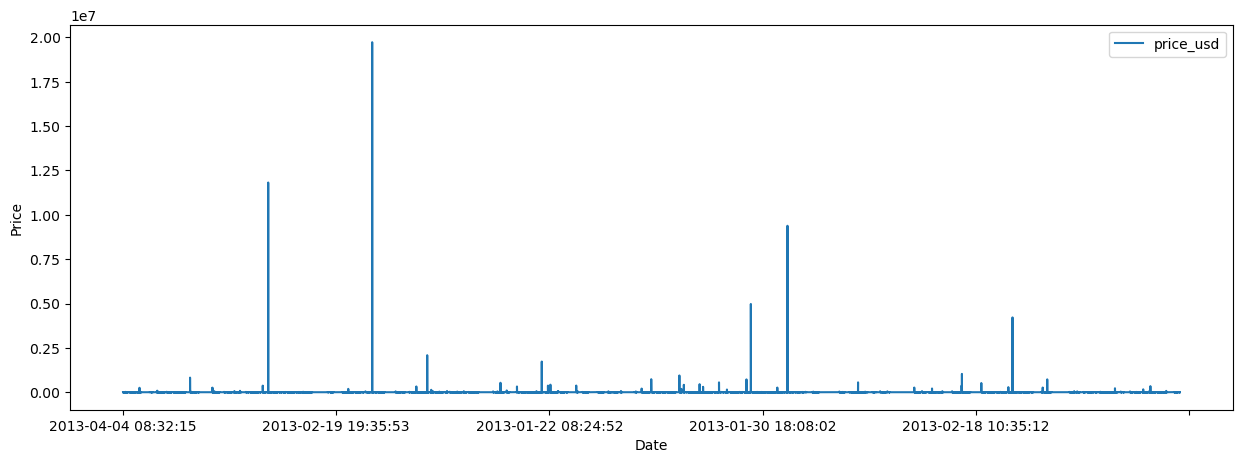

In [16]:
df_original.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')
# plt.title("Time Series Graph Of Price Of Room Based on Date-Time")

In [17]:
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
3970433,266508,2013-01-29 08:16:50,5,219,4.06,430.87,219,26604,3,2.0,0,0.00,0.0129,4.98,8,135.00,0,971,2,5,4,4,2,0,NaN,753.83,0,NaN,NaN,NaN,-1.0,0.0,6.0,-1.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3008577,202013,2013-05-23 13:14:14,5,219,NaN,NaN,219,126638,3,4.0,1,3.26,0.1810,5.05,35,119.00,0,16517,1,1,2,0,1,1,NaN,288.69,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3533531,237238,2013-02-07 19:29:13,5,219,NaN,NaN,219,20391,3,3.5,0,2.83,0.1183,5.22,18,195.00,0,4695,1,8,2,0,1,1,NaN,40.65,1,NaN,NaN,NaN,-1.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3836720,257569,2013-01-28 17:15:41,5,219,NaN,NaN,219,85502,3,4.5,1,3.81,0.1257,5.38,30,110.00,0,17603,3,4,2,0,1,1,NaN,490.25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2328270,156373,2013-05-02 02:04:16,24,81,NaN,NaN,164,100421,3,3.5,0,5.16,NaN,4.23,11,30.06,1,1479,2,29,1,1,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455665,298973,2013-04-18 17:03:39,5,149,NaN,NaN,50,40208,3,0.0,0,2.83,NaN,4.64,21,24.00,0,13970,3,14,1,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3647794,245054,2013-04-12 13:28:07,15,55,NaN,NaN,99,80983,0,0.0,0,0.00,NaN,4.84,31,365.20,0,15576,1,84,2,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3358955,225668,2013-03-04 15:20:31,5,219,NaN,NaN,219,37677,3,4.5,1,1.95,0.0555,5.59,38,129.00,0,10032,1,68,2,0,1,1,NaN,4.06,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2599335,174508,2013-06-12 11:47:19,5,219,NaN,NaN,219,70134,0,2.5,0,2.20,0.0126,0.00,10,75.00,0,14512,4,40,2,0,1,0,NaN,48.69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [18]:
# Identify the missing data points
missing_data = df.isnull()

# For each missing data point, determine the country it is located in
for column in missing_data.columns:
    # Check if the column contains missing values
    if missing_data[column].any():
        # Identify the row and column of the missing data point
        row_index, column_index = np.where(missing_data)

        # Determine the country for the missing data point
        country = df.iloc[row_index]["visitor_location_country_id"]
        # Get the first (and only) value in the series
        country = country.iloc[0]

        # Calculate the first quartile for the country
        country_data = df.loc[df["visitor_location_country_id"] == country, df.columns[column_index[0]]]
        # Calculate the first quartile for the non-nan values in the column
        first_quartile = np.nanpercentile(country_data, 25)
        print(first_quartile)
        # Replace the missing values with the first quartile
        df.loc[missing_data[column], column] = first_quartile


-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
-30.289375
